In [170]:
%matplotlib widget

In [186]:
# generate_params.py
import numpy as np
import yaml

seed = np.random.randint(0, 1e5)
np.random.seed(seed)

params = {
    "t0" : 0.2,
    "duration" : 0.04,
    "depth" : 1e-2,
    "period" : 1.1,
    "error" : 1e-3,
}

params.update({
    "omega" : 2*np.pi/(params["duration"] * np.random.uniform(0.1, 5)),
    "quality" : np.random.uniform(10, 100),
    "sigma" : params["depth"] * np.random.uniform(0.1, 5),
    "seed" : seed,
})

yaml.dump(params, open(f"../data/params/{params['seed']}.yaml", "w"))

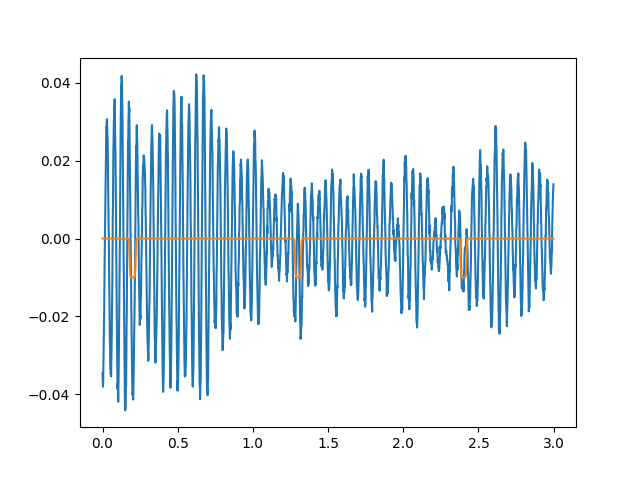

In [187]:
# make_lightcurve.py
from nuance.utils import periodic_transit

time = np.arange(0, 3, 2/60/24)

params = yaml.full_load(open(f"../data/params/{params['seed']}.yaml", "r"))
kernel = tinygp.kernels.quasisep.SHO(params['omega'], params['quality'], sigma=params["sigma"])
gp = tinygp.GaussianProcess(kernel, time, diag=params['error']**2)

transit = periodic_transit(time, params["t0"], params["duration"], params["depth"], P=params["period"])
y = gp.sample(jax.random.PRNGKey(seed)) + transit

plt.figure()
plt.plot(time, y, "-")
plt.plot(time, transit)

np.save(f"../data/lightcurves/{params['seed']}.npy", np.array([time, y, np.ones_like(y)*error]))

In [161]:
len(time)

7200

In [159]:
2/60/24

0.001388888888888889

In [131]:
transit = periodic_transit(time, params["t0"], params["duration"], params["depth"], P=params["period"])

In [4]:
import tinygp

In [7]:
time = np.linspace(0, 10, 1000) + 0.23

In [76]:
omega = 2*np.pi/(duration * np.random.uniform(0.1, 5))
quality = np.random.uniform(10, 100)
sigma = depth * np.random.uniform(0.1, 5)
seed = np.random.randint(0, 1e5)



kernel = tinygp.kernels.quasisep.SHO(omega, quality)
gp = tinygp.GaussianProcess(kernel, time, diag=error**2)

In [109]:
import jax

y = gp.sample(jax.random.PRNGKey(seed))

In [110]:
import matplotlib.pyplot as plt

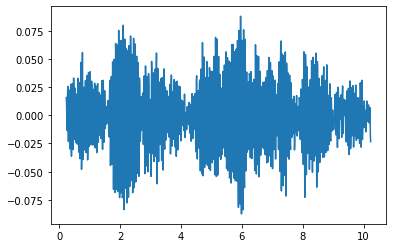

In [136]:
plt.plot(time, y)

In [99]:
seed

70764